In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import io

from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output

# Settings
pd.options.display.max_columns = None
pd.options.display.max_rows = 10

In [11]:
# Deklaration
path = "../Datasets/"

# Clean the Dataset, because bad Separator
with open(path + 'books.csv', encoding='utf-8') as f:
    data=f.readline().replace(' ', '').replace(',', '|')
    data+=f.read().replace(', ', '||').replace(',', '|').replace('||', ', ')

# Covert IO obj to Dataframe
dataIO = io.StringIO(data)
df = pd.read_csv(dataIO, 
                 encoding='utf-8',
                 sep='|',
                 decimal='.')

In [12]:
# Bereinigung des DFs
# Leere Spalten löschen
unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(labels=unnamed_cols, axis=1)

# Leere Datensätze löschen
print('Datensatzlänge vor Bereinigung: ' + str(len(df)))
df = df.dropna()
print('Datensatzlänge nach Bereinigung: ' + str(len(df)))

Datensatzlänge vor Bereinigung: 11127
Datensatzlänge nach Bereinigung: 11126


In [4]:
# Write clean CSV
#df.to_csv(path + 'books_clean.csv',
#         index=False,
#         sep='|')

#df = pd.read_csv(path + 'books_clean.csv',
#          sep='|')

In [13]:
df.head(2)

bookID                                              title  \
0      1  Harry Potter and the Half-Blood Prince (Harry ...   
1      2  Harry Potter and the Order of the Phoenix (Har...   

                      authors  average_rating        isbn         isbn13  \
0  J.K. Rowling/Mary GrandPré            4.57  0439785960  9780439785969   
1  J.K. Rowling/Mary GrandPré            4.49  0439358078  9780439358071   

  language_code  num_pages  ratings_count text_reviews_count publication_date  \
0           eng        652        2095690              27591        9/16/2006   
1           eng        870        2153167              29221         9/1/2004   

         publisher  
0  Scholastic Inc.  
1  Scholastic Inc.

In [6]:
# Datenvorbereiten um Correlation zu berechen
for col in df.columns: 
    df[col]=df[col].astype('category').cat.codes
    
df_stats = df.describe().loc[['mean', 'std', 'min', 'max']]
df_stats.loc['variance'] = df_stats.loc['std']**2
df_stats

bookID         title       authors  average_rating  \
mean      5.562500e+03  5.177550e+03  3.338930e+03      121.089340   
std       3.211944e+03  2.984238e+03  1.910003e+03       29.384128   
min       0.000000e+00  0.000000e+00  0.000000e+00        0.000000   
max       1.112500e+04  1.035000e+04  6.641000e+03      208.000000   
variance  1.031658e+07  8.905675e+06  3.648110e+06      863.426984   

                  isbn        isbn13  language_code     num_pages  \
mean      5.562500e+03  5.562500e+03       5.315927    317.671221   
std       3.211944e+03  3.211944e+03       2.603343    192.591333   
min       0.000000e+00  0.000000e+00       0.000000      0.000000   
max       1.112500e+04  1.112500e+04      26.000000    996.000000   
variance  1.031658e+07  1.031658e+07       6.777395  37091.421422   

          ratings_count  text_reviews_count  publication_date      publisher  
mean       1.461093e+03          236.555456      1.829400e+03    1184.492180  
std        1.605717e+03          405.011189      1.087686e+03     678.912058  
min        0.000000e+00            0.000000      0.000000e+00       0.000000  
max        5.293000e+03         1821.000000      3.678000e+03    2291.000000  
variance   2.578326e+06       164034.063576      1.183060e+06  460921.582276

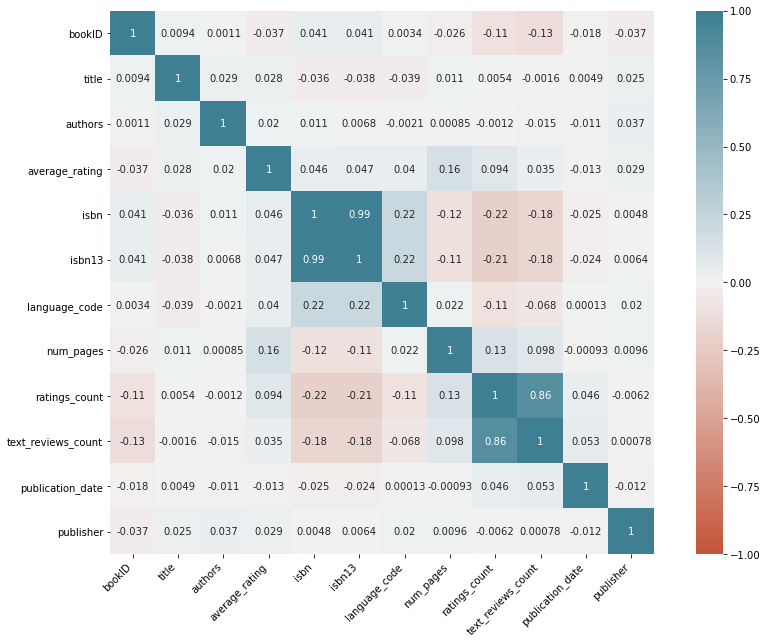

In [7]:
# Datenvorbereiten um Correlation zu berechen
for col in df.columns: 
    df[col]=df[col].astype('category').cat.codes


# Heatmap um Zusammenhänge zu erkennen
plt.subplots(figsize=(15,10))
ax = sns.heatmap(
    df.corr(),
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
clear_output(wait=True)